# Data Understanding

The purpose of this notebook is to perform analysis on the dataset in order to provide insightful statistics of the image data.

In [19]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dataset

In [2]:
# Vars

IMAGES_DIR = os.path.join(dataset.ROOT_DIR, 'assets', 'images')
save_figure = lambda filename: plt.savefig(os.path.join(IMAGES_DIR, filename))

In [3]:
# Initialize dataset object
project_dataset = dataset.ProjectDataset()

# Create dataframe

df = project_dataset.dataframe(type_ = 'filepath')

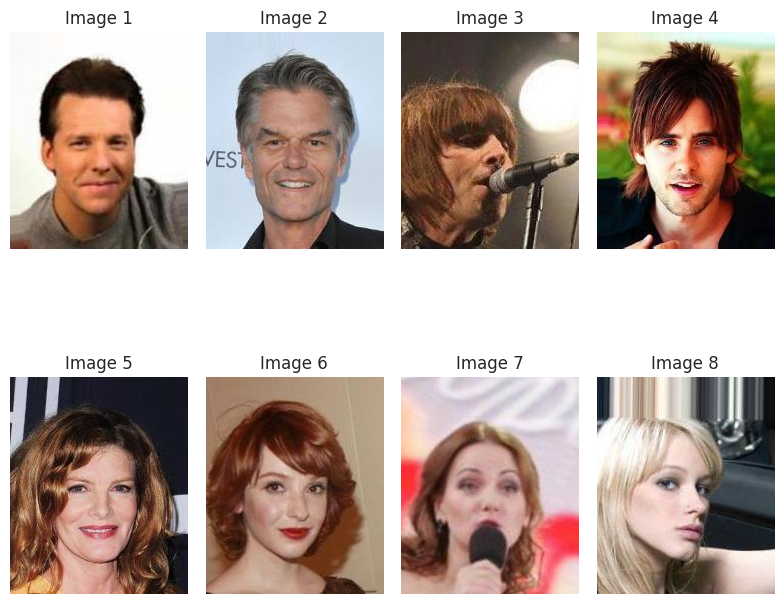

In [34]:
# Image montage / Sample of dataset

sample_size = 8 # Total number of images

male_df = df[df['gender'] == 1]
female_df = df[df['gender'] == 0]

sample_male = male_df.sample(n=round(sample_size / 2))
sample_female = female_df.sample(n=round(sample_size / 2))

sample = pd.concat([sample_male, sample_female])

cols = 4  # Number of columns in the montage
rows = (sample_size + cols - 1) // cols  # Calculate the number of rows

fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for i, image_path in enumerate(sample['file']):
    ax = axes[i // cols, i % cols]
    img = plt.imread(image_path)
    ax.imshow(img)
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

# Remove any empty subplots
for i in range(sample_size, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
save_figure('data_sample.png')  # Save figure
plt.show()

# Delete references for garbage collection
del sample
del sample_male
del sample_female
del male_df
del female_df


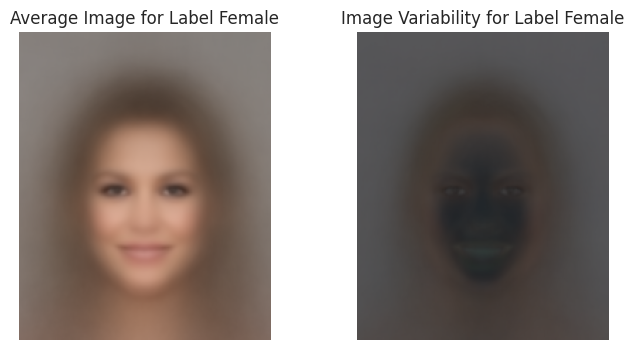

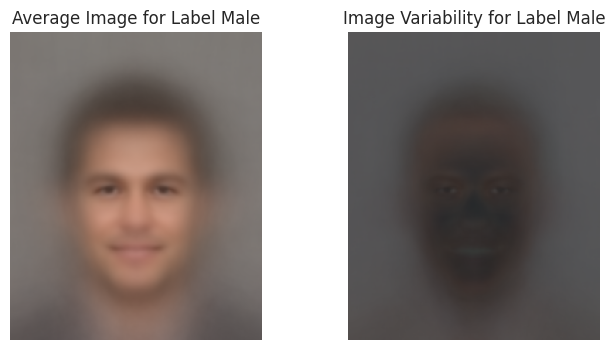

In [32]:
# Average image and image variability

X = project_dataset.images_array(normalize=True)['all']['all']
X = np.array(X)
y = df['gender'].values

unique_labels = np.unique(y)

avg_images = {}
std_images = {}

# Calculate average and std images for each label
for label in unique_labels:
    # Filter images for the current label
    label_images = X[y == label]
    
    # Calculate average image and standard deviation image
    avg_img = np.mean(label_images, axis=0)
    std_img = np.std(label_images, axis=0)
    
    # Store results in dictionaries
    avg_images[label] = avg_img
    std_images[label] = std_img

# Display average and std images for each label
for count, label in enumerate(unique_labels):
    plt.figure(figsize=(8, 4))
    
    # Average Image
    plt.subplot(1, 2, 1)
    plt.title(f"Average Image for Label {'Male' if label == 1 else 'Female'}")
    plt.imshow(avg_images[label], cmap='gray')
    plt.axis('off')
    
    # Image Variability (Standard Deviation) Image
    plt.subplot(1, 2, 2)
    plt.title(f"Image Variability for Label {'Male' if label == 1 else 'Female'}")
    plt.imshow(std_images[label], cmap='gray')
    plt.axis('off')
    
    save_figure(f'data_avg_std_{count}.png')  # Save figure
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


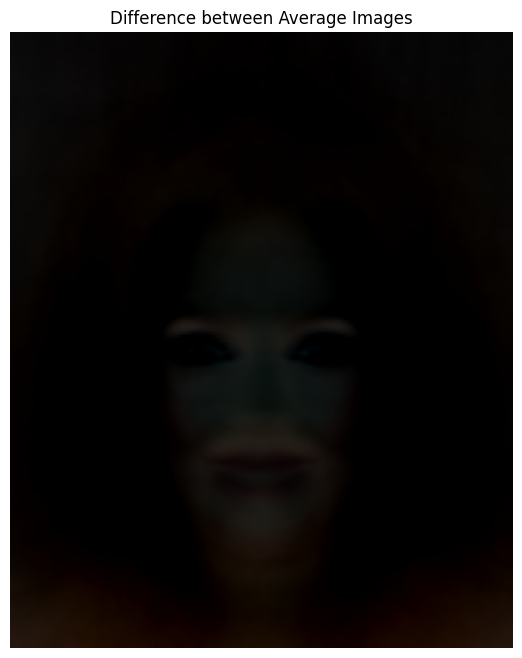

In [7]:
# Difference between average male and average female

avg_difference = avg_images[0] - avg_images[1]

# Plot the difference between the average images
plt.figure(figsize=(8, 8))
plt.imshow(avg_difference, cmap='gray')
plt.title('Difference between Average Images')
plt.axis('off')
save_figure('diff_avg_genders.png')
plt.show()

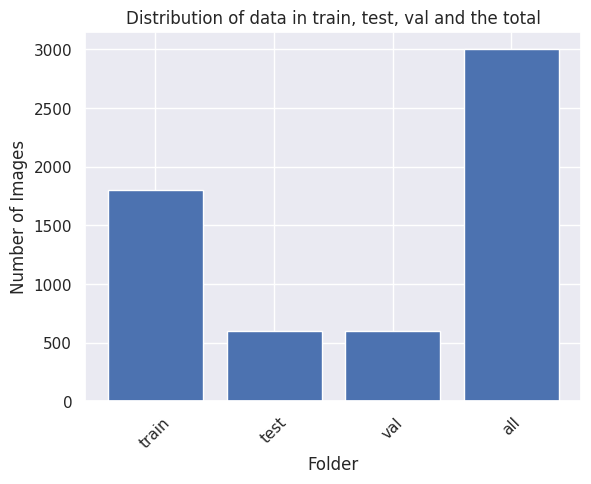

In [52]:
# Plot labels
sns.set(style="darkgrid")
data = project_dataset.labels()

# Initialize lists to store data for plotting
labels = []
counts = []

# Iterate through the dictionary and count items at each level
for key, value in data.items():
    labels.append(key)
    counts.append(len(data[key]['all']))

# Create a bar plot
plt.bar(labels, counts)
plt.xlabel('Folder')
plt.ylabel('Number of Images')
plt.title('Distribution of data in train, test, val and the total')
plt.xticks(rotation=45)

save_figure('folder_distribution.png')
plt.show()


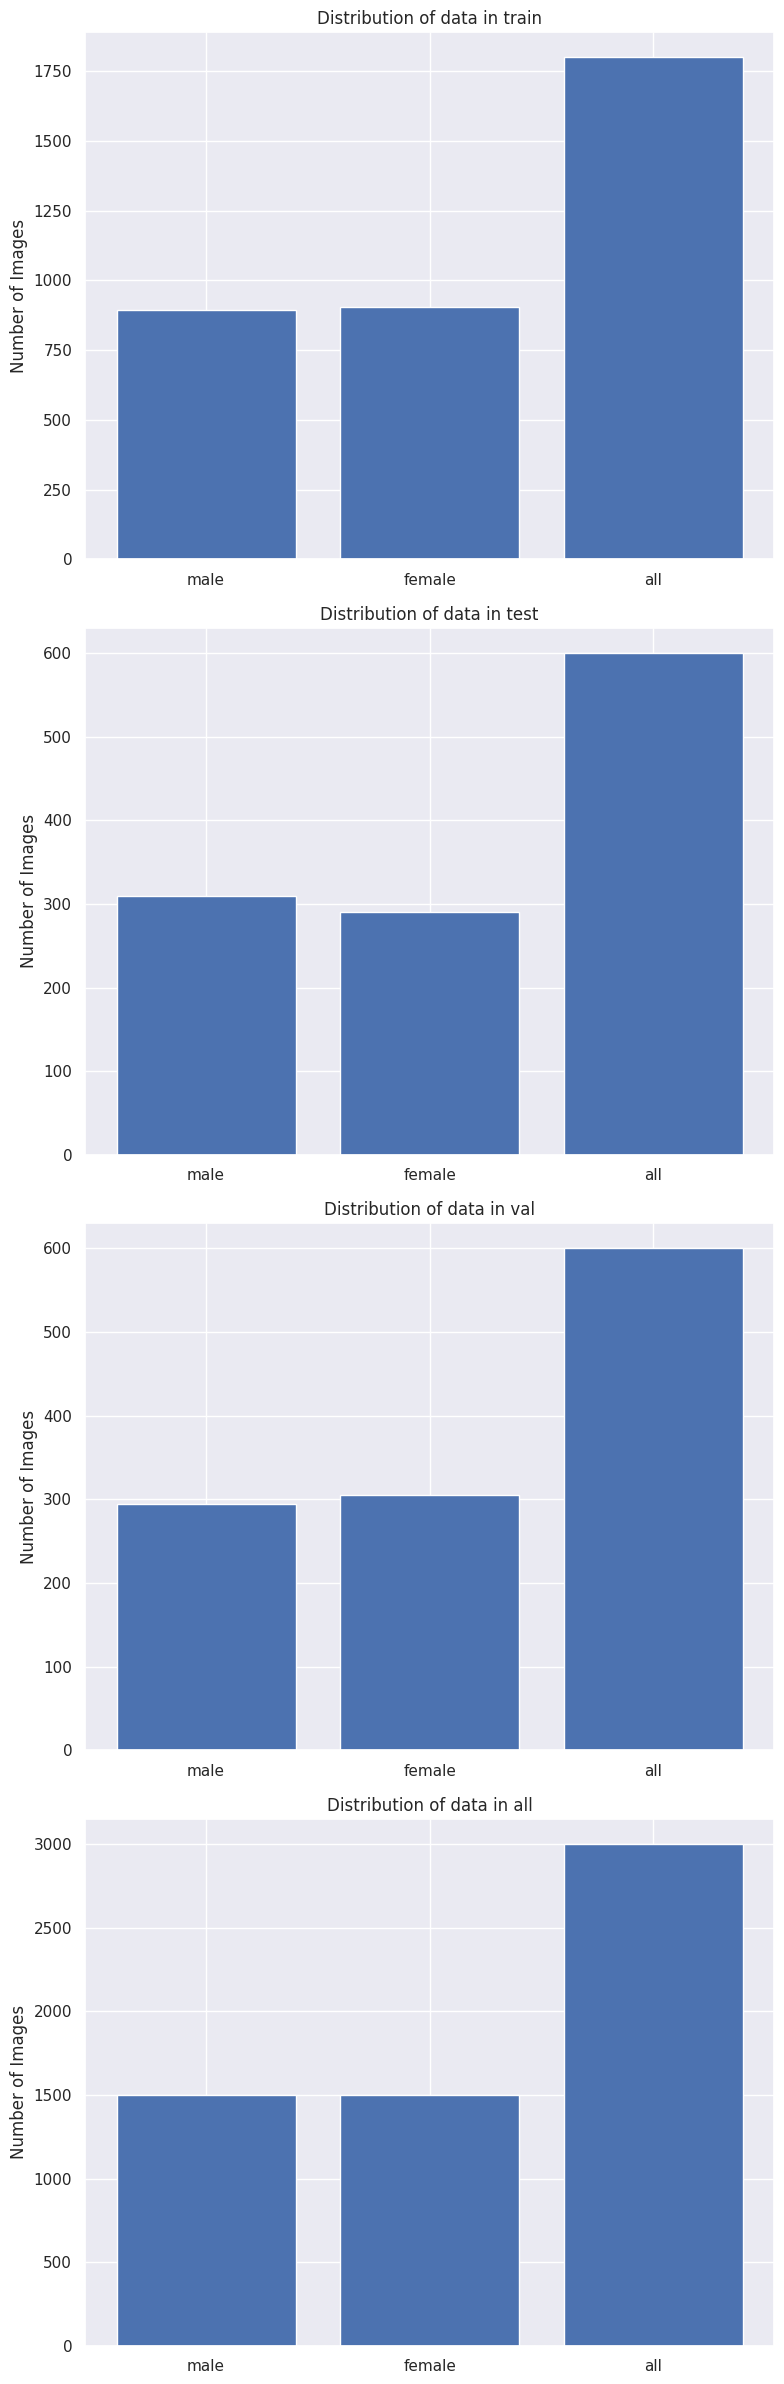

In [38]:
splits = data.keys()
categories = ['male', 'female', 'all']

# Create subplots for each split
fig, axes = plt.subplots(len(splits), 1, figsize=(8, 6 * len(splits)))

for i, split in enumerate(splits):
    counts = [len(data[split][category]) for category in categories]

    # Create a bar plot for each split
    axes[i].bar(categories, counts)
    axes[i].set_ylabel('Number of Images')
    axes[i].set_title(f'Distribution of data in {split}')

plt.tight_layout()
save_figure('label_distribution.png')
plt.show()